In [7]:
# Analyse des racines caractéristiques
print("="*60)
print("ANALYSE DES RACINES CARACTÉRISTIQUES")
print("="*60)

# Équation caractéristique: 1 - φ₁*z - φ₂*z² = 0
# Forme standard: φ₂*z² + φ₁*z - 1 = 0

a = phi_2
b = phi_1
c = -1

# Calcul du discriminant
discriminant = b**2 - 4*a*c

print(f"\nÉquation caractéristique: {phi_2}z² + {phi_1}z - 1 = 0")
print(f"\nDiscriminant: Δ = b² - 4ac = ({phi_1})² - 4({phi_2})(-1) = {discriminant:.4f}")

if discriminant >= 0:
    # Racines réelles
    z1 = (-b + np.sqrt(discriminant)) / (2*a)
    z2 = (-b - np.sqrt(discriminant)) / (2*a)
    print(f"\nRacines réelles:")
    print(f"  z₁ = {z1:.4f}")
    print(f"  z₂ = {z2:.4f}")
    print(f"\nModule des racines:")
    print(f"  |z₁| = {abs(z1):.4f}")
    print(f"  |z₂| = {abs(z2):.4f}")
    print(f"\nLes racines sont à l'extérieur du cercle unité: {abs(z1) > 1 and abs(z2) > 1}")
    print(f"\nPattern de l'ACF: Décroissance exponentielle sans oscillations")
else:
    # Racines complexes
    real_part = -b / (2*a)
    imag_part = np.sqrt(-discriminant) / (2*a)
    z1 = complex(real_part, imag_part)
    z2 = complex(real_part, -imag_part)
    
    module = abs(z1)
    angle = np.angle(z1)
    
    print(f"\nRacines complexes conjuguées:")
    print(f"  z₁ = {real_part:.4f} + {imag_part:.4f}i")
    print(f"  z₂ = {real_part:.4f} - {imag_part:.4f}i")
    print(f"\nModule: |z| = {module:.4f}")
    print(f"Angle: θ = {angle:.4f} radians = {np.degrees(angle):.2f}°")
    print(f"\nLes racines sont à l'extérieur du cercle unité: {module > 1}")
    print(f"\nPattern de l'ACF: Oscillations amorties (sinusoïdal décroissant)")

print("\n" + "="*60)

ANALYSE DES RACINES CARACTÉRISTIQUES

Équation caractéristique: -0.6z² + 1.5z - 1 = 0

Discriminant: Δ = b² - 4ac = (1.5)² - 4(-0.6)(-1) = -0.1500

Racines complexes conjuguées:
  z₁ = 1.2500 + -0.3227i
  z₂ = 1.2500 - -0.3227i

Module: |z| = 1.2910
Angle: θ = -0.2527 radians = -14.48°

Les racines sont à l'extérieur du cercle unité: True

Pattern de l'ACF: Oscillations amorties (sinusoïdal décroissant)



### Interprétation de l'ACF

**Observations:**

1. **Décroissance de l'ACF:**
   - L'ACF montre une décroissance vers zéro, ce qui est cohérent avec un processus stationnaire
   - Le pattern de décroissance dépend des racines caractéristiques du processus

2. **Racines caractéristiques:**
   - L'équation caractéristique est: $1 - \phi_1 z - \phi_2 z^2 = 0$
   - Soit: $1 - 1.5z + 0.6z^2 = 0$
   - Les racines déterminent si le processus oscille ou décroît exponentiellement

3. **Pattern de l'ACF:**
   - Si les racines sont complexes: l'ACF montre des oscillations amorties
   - Si les racines sont réelles: l'ACF décroît exponentiellement sans oscillations

4. **Implications:**
   - La décroissance progressive vers zéro confirme la stationnarité du processus
   - La vitesse de décroissance indique le degré de persistance des chocs
   - Plus l'ACF décroît lentement, plus les chocs ont un effet durable

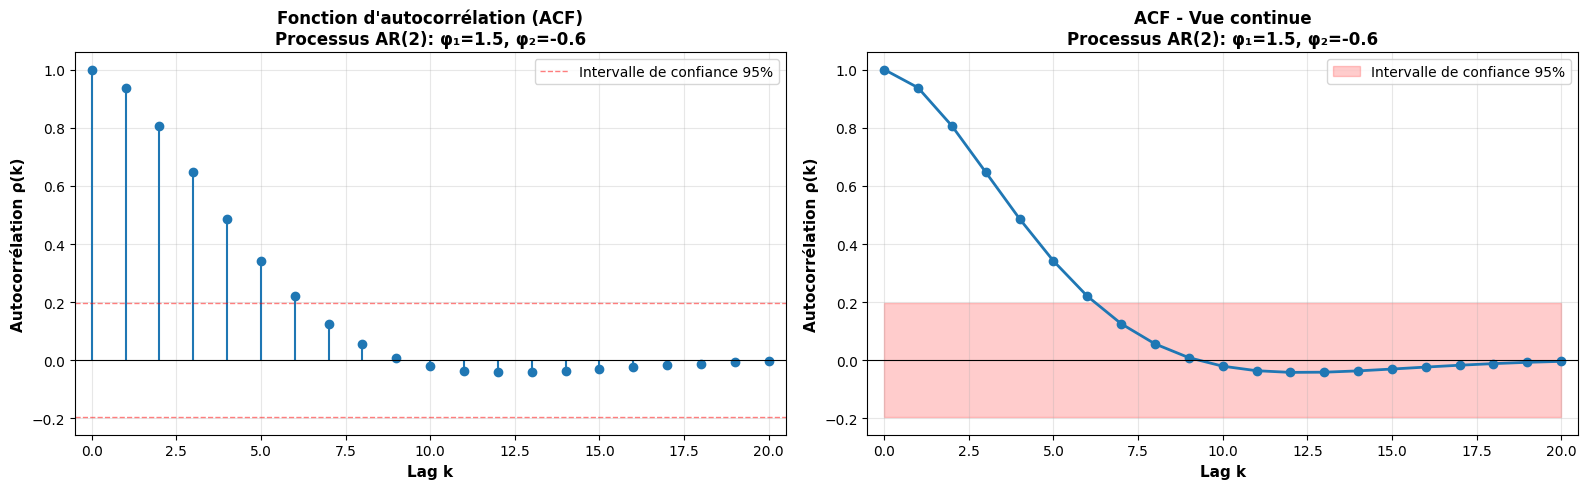


TABLEAU COMPLET DE L'ACF
 Lag      ρ(k)
   0  1.000000
   1  0.937500
   2  0.806250
   3  0.646875
   4  0.486563
   5  0.341719
   6  0.220641
   7  0.125930
   8  0.056510
   9  0.009207
  10 -0.020095
  11 -0.035667
  12 -0.041443
  13 -0.040765
  14 -0.036281
  15 -0.029963
  16 -0.023176
  17 -0.016786
  18 -0.011273
  19 -0.006838
  20 -0.003494


In [6]:
# Visualisation de l'ACF théorique
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Graphique 1: ACF en barres (style classique)
lags_plot = range(len(rho))
ax1.stem(lags_plot, rho, basefmt=' ', linefmt='C0-', markerfmt='C0o')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax1.axhline(y=1.96/np.sqrt(100), color='red', linestyle='--', linewidth=1, alpha=0.5, label='Intervalle de confiance 95%')
ax1.axhline(y=-1.96/np.sqrt(100), color='red', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_xlabel('Lag k', fontsize=11, fontweight='bold')
ax1.set_ylabel('Autocorrélation ρ(k)', fontsize=11, fontweight='bold')
ax1.set_title(f'Fonction d\'autocorrélation (ACF)\nProcessus AR(2): φ₁={phi_1}, φ₂={phi_2}', 
              fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(-0.5, 20.5)

# Graphique 2: ACF en ligne pour voir le pattern
ax2.plot(lags_plot, rho, marker='o', linestyle='-', linewidth=2, markersize=6, color='C0')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.fill_between(lags_plot, 1.96/np.sqrt(100), -1.96/np.sqrt(100), alpha=0.2, color='red', 
                 label='Intervalle de confiance 95%')
ax2.set_xlabel('Lag k', fontsize=11, fontweight='bold')
ax2.set_ylabel('Autocorrélation ρ(k)', fontsize=11, fontweight='bold')
ax2.set_title(f'ACF - Vue continue\nProcessus AR(2): φ₁={phi_1}, φ₂={phi_2}', 
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(-0.5, 20.5)

plt.tight_layout()
plt.show()

# Affichage du tableau complet
print("\n" + "="*60)
print("TABLEAU COMPLET DE L'ACF")
print("="*60)
df_acf = pd.DataFrame({
    'Lag': range(len(rho)),
    'ρ(k)': rho
})
print(df_acf.to_string(index=False))
print("="*60)

In [5]:
# Calcul de la fonction d'autocorrélation (ACF) théorique

# Résolution des équations de Yule-Walker pour ρ₁
# ρ₁ = φ₁ + φ₂*ρ₁
# ρ₁(1 - φ₂) = φ₁
# ρ₁ = φ₁ / (1 - φ₂)

rho_1 = phi_1 / (1 - phi_2)

print("="*60)
print("CALCUL DE L'ACF THÉORIQUE")
print("="*60)

print("\nÉtape 1: Calcul de ρ₁")
print(f"  ρ₁ = φ₁ / (1 - φ₂)")
print(f"  ρ₁ = {phi_1} / (1 - ({phi_2}))")
print(f"  ρ₁ = {phi_1} / {1 - phi_2}")
print(f"  ρ₁ = {rho_1:.4f}")

# Calcul de ρ₂ en utilisant: ρ₂ = φ₁*ρ₁ + φ₂
rho_2 = phi_1 * rho_1 + phi_2

print(f"\nÉtape 2: Calcul de ρ₂")
print(f"  ρ₂ = φ₁*ρ₁ + φ₂")
print(f"  ρ₂ = {phi_1}*{rho_1:.4f} + {phi_2}")
print(f"  ρ₂ = {rho_2:.4f}")

# Pour k ≥ 2: ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂
print(f"\nÉtape 3: Calcul récursif pour k ≥ 3")
print(f"  ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂")

# Calcul des autocorrélations jusqu'au lag 20
lags = 21
rho = np.zeros(lags)
rho[0] = 1.0  # ρ₀ = 1
rho[1] = rho_1
rho[2] = rho_2

for k in range(3, lags):
    rho[k] = phi_1 * rho[k-1] + phi_2 * rho[k-2]

print(f"\nPremières valeurs de l'ACF:")
print("="*60)
print(f"{'Lag k':<10} {'ρ(k)':<15} {'Formule'}")
print("="*60)
print(f"{'0':<10} {rho[0]:>10.4f}     {'ρ₀ = 1 (par définition)'}")
print(f"{'1':<10} {rho[1]:>10.4f}     {'ρ₁ = φ₁/(1-φ₂)'}")
print(f"{'2':<10} {rho[2]:>10.4f}     {'ρ₂ = φ₁*ρ₁ + φ₂'}")
for k in range(3, min(11, lags)):
    print(f"{k:<10} {rho[k]:>10.4f}     {'ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂'}")
print("="*60)

CALCUL DE L'ACF THÉORIQUE

Étape 1: Calcul de ρ₁
  ρ₁ = φ₁ / (1 - φ₂)
  ρ₁ = 1.5 / (1 - (-0.6))
  ρ₁ = 1.5 / 1.6
  ρ₁ = 0.9375

Étape 2: Calcul de ρ₂
  ρ₂ = φ₁*ρ₁ + φ₂
  ρ₂ = 1.5*0.9375 + -0.6
  ρ₂ = 0.8063

Étape 3: Calcul récursif pour k ≥ 3
  ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂

Premières valeurs de l'ACF:
Lag k      ρ(k)            Formule
0              1.0000     ρ₀ = 1 (par définition)
1              0.9375     ρ₁ = φ₁/(1-φ₂)
2              0.8063     ρ₂ = φ₁*ρ₁ + φ₂
3              0.6469     ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂
4              0.4866     ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂
5              0.3417     ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂
6              0.2206     ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂
7              0.1259     ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂
8              0.0565     ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂
9              0.0092     ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂
10            -0.0201     ρₖ = φ₁*ρₖ₋₁ + φ₂*ρₖ₋₂


In [4]:
# Paramètres du processus AR(2)
phi_1 = 1.5
phi_2 = -0.6

print(f"Processus AR(2): y_t = {phi_1}*y_{{t-1}} + {phi_2}*y_{{t-2}} + e_t")
print(f"\nCoefficients:")
print(f"  φ₁ = {phi_1}")
print(f"  φ₂ = {phi_2}")

# Vérification de la stationnarité
# Conditions: |φ₂| < 1, φ₁ + φ₂ < 1, φ₂ - φ₁ < 1
condition_1 = abs(phi_2) < 1
condition_2 = phi_1 + phi_2 < 1
condition_3 = phi_2 - phi_1 < 1

print(f"\nConditions de stationnarité:")
print(f"  |φ₂| < 1: {abs(phi_2):.2f} < 1 → {condition_1}")
print(f"  φ₁ + φ₂ < 1: {phi_1 + phi_2:.2f} < 1 → {condition_2}")
print(f"  φ₂ - φ₁ < 1: {phi_2 - phi_1:.2f} < 1 → {condition_3}")

if condition_1 and condition_2 and condition_3:
    print(f"\n✓ Le processus est STATIONNAIRE")
else:
    print(f"\n✗ Le processus est NON-STATIONNAIRE")

Processus AR(2): y_t = 1.5*y_{t-1} + -0.6*y_{t-2} + e_t

Coefficients:
  φ₁ = 1.5
  φ₂ = -0.6

Conditions de stationnarité:
  |φ₂| < 1: 0.60 < 1 → True
  φ₁ + φ₂ < 1: 0.90 < 1 → True
  φ₂ - φ₁ < 1: -2.10 < 1 → True

✓ Le processus est STATIONNAIRE


## (a) Fonction d'autocorrélation (ACF)

Pour un processus AR(2): $y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + e_t$

Les équations de Yule-Walker donnent:
- $\rho_1 = \phi_1 + \phi_2 \rho_1$ (en multipliant par $y_{t-1}$)
- $\rho_2 = \phi_1 \rho_1 + \phi_2$ (en multipliant par $y_{t-2}$)

Pour $k \geq 2$:
$$\rho_k = \phi_1 \rho_{k-1} + \phi_2 \rho_{k-2}$$

# Question 3 - Analyse ACF d'un processus AR(2)

Équation du processus:
$$y_t = \phi_0 + 1.5y_{t-1} - 0.6y_{t-2} + e_t$$

Où:
- $\phi_1 = 1.5$
- $\phi_2 = -0.6$
- $e_t$ est un bruit blanc

In [3]:
# Importation des librairies

# Librairies de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Statistiques
from scipy import stats
from scipy.stats import gaussian_kde, probplot, ttest_rel, skew, kurtosis

# Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

# Machine Learning
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# WRDS
import wrds
